# Exploración Registro ordeño Hato

Este reporte presenta la exploración de los datasets del hato de vacas. La información utilizada pertenece al CAETEC y corresponde a registros históricos de todas las vacas que se encuentran bajo su gobernanza.

El propósito de este reporte es lograr una comprensión clara de los datos, su calidad, su formato y las posibles transformaciones necesarias.

## Librerías Utilizadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Google Drive
from google.colab import drive

## Sistema Operativo
import os

## Importación de los datos

Los datos importados solo pueden ser accesados por miembros del equipo Vacas Saturno Saturnitas, por lo que su consulta se realiza exclusivamente a través de carpetas protegidas en Google Drive.

Para obtener acceso, es necesario contactar a los miembros del equipo.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
registers_path = '/content/drive/MyDrive/Vacas/Ficha Vacas HATO/Registro ordeño'
print(f"Ruta de registros actualizada a: {registers_path}")

Ruta de registros actualizada a: /content/drive/MyDrive/Vacas/Ficha Vacas HATO/Registro ordeño


Dentro de la carpeta se identifican varios archivos correspondientes a registros de producción de leche por sesión. Para garantizar un análisis más robusto y representativo, se seleccionarán aquellos archivos que contengan un mayor volumen de datos, ya que ofrecen una mejor cobertura temporal y mayor validez estadística.

In [ ]:
excel_files = []
for file in os.listdir(registers_path):
    if file.endswith(('.csv', '.xls')):
        excel_files.append(file)

print(f"Archivos Excel encontrados en '{registers_path}':")
if excel_files:
    for excel_file in excel_files:
        print(excel_file)

Archivos Excel encontrados en '/content/drive/MyDrive/Vacas/Ficha Vacas HATO/Registro ordeño':
Producciones de leche por sesión 8792.csv
Producciones de leche por sesión 8779.csv
Producciones de leche por sesión 8780.csv
Producciones de leche por sesión 8767.csv
Producciones de leche por sesión 8768.csv
Producciones de leche por sesión 8758.csv
Producciones de leche por sesión 6038.csv
Producciones de leche por sesión 6177.csv
Producciones de leche por sesión 6181.csv
Producciones de leche por sesión 8777.csv
Producciones de leche por sesión 8798.csv
Producciones de leche por sesión 8725.csv
Producciones de leche por sesión 2166.csv
Producciones de leche por sesión 1211.csv
Producciones de leche por sesión 8775.csv
Producciones de leche por sesión 6241.csv
Producciones de leche por sesión 8702.csv
Producciones de leche por sesión 6187.csv
Producciones de leche por sesión 8707.csv
Producciones de leche por sesión 2084.csv
Producciones de leche por sesión 8742.csv
Pr

Solo se están considerando los archivos cuyo tamaño supera los 1500 registros. Esto implica que la mayoría de los datos analizados provienen de vacas que han permanecido durante un periodo prolongado dentro del CAETEC, lo que permite obtener información más estable y consistente sobre su comportamiento productivo.

In [ ]:
long_excel_files = []

for excel_file in excel_files:
    file_path = os.path.join(registers_path, excel_file)
    if excel_file.endswith('.csv'):
        df = pd.read_csv(file_path)
        if len(df) > 1500:
            long_excel_files.append(excel_file)
            print(f"Tamaño del archivo {excel_file}: {len(df)} filas")
    elif excel_file.endswith(('.xls', '.xlsx')):
        df = pd.read_excel(file_path, engine='openpyxl')
    else:
        print(f"Skipping unknown file type: {excel_file}")
        continue

Tamaño del archivo Producciones de leche por sesión 6038.csv: 2445 filas
Tamaño del archivo Producciones de leche por sesión 6177.csv: 2725 filas
Tamaño del archivo Producciones de leche por sesión 6181.csv: 2866 filas
Tamaño del archivo Producciones de leche por sesión 6241.csv: 2311 filas
Tamaño del archivo Producciones de leche por sesión 6187.csv: 2523 filas
Tamaño del archivo Producciones de leche por sesión 2084.csv: 1583 filas
Tamaño del archivo Producciones de leche por sesión 6036.csv: 2830 filas
Tamaño del archivo Producciones de leche por sesión 6122.csv: 3374 filas
Tamaño del archivo Producciones de leche por sesión 2069.csv: 1897 filas
Tamaño del archivo Producciones de leche por sesión 2090.csv: 1578 filas
Tamaño del archivo Producciones de leche por sesión 5921.csv: 2180 filas
Tamaño del archivo Producciones de leche por sesión 1598.csv: 2395 filas
Tamaño del archivo Producciones de leche por sesión 6030.csv: 2430 filas
Tamaño del archivo Producciones de lec

Para mostrar correctamente las etiquetas de cada columna, se utiliza el parámetro header=1, de modo que el lector identifica la fila adecuada dentro del archivo CSV como encabezado. Esto garantiza que las columnas se asignen de forma correcta durante la lectura de los datos.

In [ ]:
long_excel_file_example = long_excel_files[0]
df_example = pd.read_csv(os.path.join(registers_path, long_excel_file_example), header=1)
df_example.head()

,Hora de inicio,Número de ordeño,Duración (mm:ss),Producción (kg),RCS (* 1000 células / ml),Intervalo de ordeño (hh:mm),DI,DD,TI,TD,...,TD.5,Destino Leche,Razón de la desviación,Programa de lavado,MS,Usuario,Patada,Incompleto,Pezones no encontrados,MDI
0,14/11/2025 11:11 a. m.,2,07:28,12.90,NaN,07:58,3.06,2.89,3.96,2.99,...,0,Tanque,NaN,NaN,VMS 1,NaN,NaN,NaN,NaN,1.1
1,14/11/2025 03:03 a. m.,1,09:01,17.29,NaN,10:16,4.03,3.93,5.13,4.20,...,0,Tanque,NaN,NaN,VMS 1,NaN,NaN,NaN,NaN,1.2
2,13/11/2025 04:40 p. m.,3,07:06,10.43,NaN,06:47,2.43,2.47,3.24,2.29,...,0,Tanque,NaN,NaN,VMS 1,NaN,NaN,NaN,NaN,1.1
3,13/11/2025 09:45 a. m.,2,08:10,13.51,NaN,09:39,3.23,3.04,4.25,2.99,...,0,Tanque,NaN,NaN,VMS 1,NaN,NaN,NaN,NaN,1.1
4,12/11/2025 11:54 p. m.,1,10:47,22.30,NaN,14:27,5.29,5.00,6.42,5.59,...,0,Tanque,NaN,NaN,VMS 1,NaN,NaN,NaN,NaN,1.2


Se observa que las columnas Usuario, RCS (1000 células/ml), Razón de la desviación, Ubre, Pezón, Patada, Incompleto y Pezones no encontrados presentan un volumen excesivo de datos nulos. Dado que esta información no aporta valor para los objetivos del proyecto y dificulta el análisis, se opta por eliminar esas filas, ya que no contribuyen con evidencia útil ni permiten extraer conclusiones significativas.

In [ ]:
print("--- Información del DataFrame df_example ---")
display(df_example.info())

print(f"\nLongitud (número de filas) del DataFrame df_example: {len(df_example)}")

print("\nColumnas del DataFrame df_example:")
display(df_example.columns)

--- Información del DataFrame df_example ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hora de inicio               2444 non-null   object 
 1   Número de ordeño             2444 non-null   int64  
 2   Duración (mm:ss)             2444 non-null   object 
 3   Producción (kg)              2444 non-null   float64
 4   RCS (* 1000 células / ml)    0 non-null      float64
 5   Intervalo de ordeño (hh:mm)  2444 non-null   object 
 6   DI                           2444 non-null   float64
 7   DD                           2444 non-null   float64
 8   TI                           2444 non-null   float64
 9   TD                           2444 non-null   float64
 10  Ubre                         2444 non-null   int64  
 11  Pezón                        326 non-null    object 
 12  DI.1                         24

None


Longitud (número de filas) del DataFrame df_example: 2444

Columnas del DataFrame df_example:


Index(['Hora de inicio', 'Número de ordeño', 'Duración (mm:ss)',
       'Producción (kg)', 'RCS (* 1000 células / ml)',
       'Intervalo de ordeño (hh:mm)', 'DI', 'DD', 'TI', 'TD', 'Ubre', 'Pezón',
       'DI.1', 'DD.1', 'TI.1', 'TD.1', 'DI.2', 'DD.2', 'TI.2', 'TD.2', 'DI.3',
       'DD.3', 'TI.3', 'TD.3', 'DI.4', 'DD.4', 'TI.4', 'TD.4', 'Ubre.1',
       'DI.5', 'DD.5', 'TI.5', 'TD.5', 'Destino Leche',
       'Razón de la desviación', 'Programa de lavado', 'MS', 'Usuario',
       'Patada', 'Incompleto', 'Pezones no encontrados', 'MDI'],
      dtype='object')

# Columnas Innecesarias

Se eliminan las columnas que no aportan información relevante para continuar con la exploración de los datos.

Las siguientes columnas podrían considerarse relevantes; sin embargo, no aportan información útil para el análisis y, por ello, se descartaron.

## Grupo .3 - Conductividad Eléctrica (mS/cm)

| Columna | Descripción | Interpretación |
|---------|-------------|----------------|
| **DI.3** | Conductividad - Delantero Izquierdo | Normal: 4.0-5.5<br>Alerta: 5.5-6.0<br>Mastitis: >6.0 |
| **DD.3** | Conductividad - Delantero Derecho | Normal: 4.0-5.5<br>Alerta: 5.5-6.0<br>Mastitis: >6.0 |
| **TI.3** | Conductividad - Trasero Izquierdo | Normal: 4.0-5.5<br>Alerta: 5.5-6.0<br>Mastitis: >6.0 |
| **TD.3** | Conductividad - Trasero Derecho | Normal: 4.0-5.5<br>Alerta: 5.5-6.0<br>Mastitis: >6.0 |

**Interpretación**:
- **0.0** = Sensor no activado o medición no disponible
- Valores elevados indican posible **mastitis subclínica**
- La conductividad aumenta cuando hay inflamación o infección

## Grupo .4 - Código de Estado por Cuarto

| Columna | Descripción | Valores |
|---------|-------------|---------|
| **DI.4** | Código de estado/alerta - Delantero Izquierdo | 0-9 (código interno) |
| **DD.4** | Código de estado/alerta - Delantero Derecho | 0-9 (código interno) |
| **TI.4** | Código de estado/alerta - Trasero Izquierdo | 0-9 (código interno) |
| **TD.4** | Código de estado/alerta - Trasero Derecho | 0-9 (código interno) |

**Valores observados**:
- **0** = Normal, sin alertas
- **1, 8, 9** = Diferentes niveles de alerta o condiciones especiales

## Indicador General de Ubre

| Columna | Descripción | Interpretación |
|---------|-------------|----------------|
| **Ubre.1** | Código de estado general de la ubre | 0 = Normal<br>1, 8, 9 = Alertas (severidad variable) |

**Interpretación**: Resumen del estado de salud de toda la ubre.

## Grupo .5 - Código Adicional por Cuarto

| Columna | Descripción | Valores Observados |
|---------|-------------|--------------------|
| **DI.5** | Código adicional - Delantero Izquierdo | 0, 4, 5, 6, 16 |
| **DD.5** | Código adicional - Delantero Derecho | 0, 4, 5, 6, 16 |
| **TI.5** | Código adicional - Trasero Izquierdo | 0, 4, 5, 6, 16 |
| **TD.5** | Código adicional - Trasero Derecho | 0, 4, 5, 6, 16 |

**Interpretación**: Posible contador de eventos, tratamientos o alertas acumuladas.

In [ ]:
columns_to_drop = [
            'Usuario',
            'RCS (* 1000 células / ml)',
            'Razón de la desviación',
            'Ubre',
            'Pezón',
            'Patada',
            'Incompleto',
            'Pezones no encontrados',
            'Programa de lavado',
            'Ubre.1',
            'DI.3',
            'DD.3',
            'TI.3',
            'TD.3',
            'DI.4',
            'DD.4',
            'TI.4',
            'TD.4',
            'DI.5',
            'DD.5',
            'TI.5',
            'TD.5'
        ]

In [ ]:
df_example.drop(columns=columns_to_drop, inplace=True)
df_example.head()

,Hora de inicio,Número de ordeño,Duración (mm:ss),Producción (kg),Intervalo de ordeño (hh:mm),DI,DD,TI,TD,DI.1,DD.1,TI.1,TD.1,DI.2,DD.2,TI.2,TD.2,Destino Leche,MS,MDI
0,14/11/2025 11:11 a. m.,2,07:28,12.90,07:58,3.06,2.89,3.96,2.99,1.08,0.78,0.84,0.78,1.74,1.32,1.32,1.44,Tanque,VMS 1,1.1
1,14/11/2025 03:03 a. m.,1,09:01,17.29,10:16,4.03,3.93,5.13,4.20,1.08,0.84,0.84,0.84,1.62,1.26,1.20,1.26,Tanque,VMS 1,1.2
2,13/11/2025 04:40 p. m.,3,07:06,10.43,06:47,2.43,2.47,3.24,2.29,1.02,0.72,0.78,0.72,1.50,1.20,1.32,1.14,Tanque,VMS 1,1.1
3,13/11/2025 09:45 a. m.,2,08:10,13.51,09:39,3.23,3.04,4.25,2.99,1.14,0.78,0.78,0.78,1.86,1.26,1.20,1.32,Tanque,VMS 1,1.1
4,12/11/2025 11:54 p. m.,1,10:47,22.30,14:27,5.29,5.00,6.42,5.59,1.14,0.96,0.84,0.96,1.74,1.38,1.32,1.50,Tanque,VMS 1,1.2


# Columnas Útiles

| Columna | Descripción | Tipo de Dato | Ejemplo |
|---------|-------------|--------------|---------|
| **Hora de inicio** | Fecha y hora en que comenzó el ordeño | Fecha/Hora | 14/11/2025 11:11 a.m. |
| **Número de ordeño** | Secuencia del ordeño en el día (1=primero, 2=segundo, 3=tercero) | Entero (1-3) | 1, 2, 3 |
| **Duración (mm:ss)** | Tiempo total del ordeño en minutos:segundos | Tiempo | 07:28, 09:01 |
| **Producción (kg)** | Leche total extraída en kilogramos | Decimal | 12.90, 17.29 |
| **Intervalo de ordeño (hh:mm)** | Tiempo transcurrido desde el ordeño anterior | Tiempo | 07:58, 10:16 |


## Producción por Cuarto de la Ubre (kg)

| Columna | Descripción | Rango Típico |
|---------|-------------|--------------|
| **DI** | Producción del cuarto Delantero Izquierdo | 2.0 - 6.0 kg |
| **DD** | Producción del cuarto Delantero Derecho | 2.0 - 6.0 kg |
| **TI** | Producción del cuarto Trasero Izquierdo | 3.0 - 7.0 kg |
| **TD** | Producción del cuarto Trasero Derecho | 2.0 - 6.0 kg |

**Nota**: Los cuartos traseros generalmente producen más leche que los delanteros.


## Grupo .1 - Flujo Promedio (kg/min)

| Columna | Descripción | Rango Normal |
|---------|-------------|--------------|
| **DI.1** | Flujo promedio de leche - Delantero Izquierdo | 0.6 - 1.2 kg/min |
| **DD.1** | Flujo promedio de leche - Delantero Derecho | 0.6 - 1.2 kg/min |
| **TI.1** | Flujo promedio de leche - Trasero Izquierdo | 0.6 - 1.2 kg/min |
| **TD.1** | Flujo promedio de leche - Trasero Derecho | 0.6 - 1.2 kg/min |

**Interpretación**: Indica la velocidad promedio de extracción de leche por cuarto.


## Grupo .2 - Tiempo de Ordeño por Cuarto (minutos)

| Columna | Descripción | Rango Normal |
|---------|-------------|--------------|
| **DI.2** | Duración del ordeño - Delantero Izquierdo | 0.8 - 2.0 min |
| **DD.2** | Duración del ordeño - Delantero Derecho | 0.8 - 2.0 min |
| **TI.2** | Duración del ordeño - Trasero Izquierdo | 0.8 - 2.0 min |
| **TD.2** | Duración del ordeño - Trasero Derecho | 0.8 - 2.0 min |

**Interpretación**: Tiempo que el sistema estuvo extrayendo leche de cada cuarto.


## Información del Sistema

| Columna | Descripción | Valores Típicos |
|---------|-------------|-----------------|
| **Destino Leche** | Clasificación de la leche extraída | "Tanque" = Leche comercializable<br>"Descarte" = No apta para venta<br>"Calostro" = Primera leche post-parto |
| **MS** | Identificador del robot de ordeño | "VMS 1", "VMS 2" (Voluntary Milking System) |
| **MDI** | Índice de detección o identificación de mastitis | Valor decimal (ej: 1.1, 1.2, 2.4) |


## Notas Importantes

### Alertas de Salud
- **Cuarto con producción 0.0 kg**: Posible bloqueo o problema en ese cuarto
- **Conductividad > 5.5**: Requiere monitoreo, posible mastitis
- **Conductividad > 6.0**: Probable mastitis, requiere tratamiento
- **Ubre.1 ≠ 0**: Revisar estado general de la ubre

### Producción Normal
- **Total por ordeño**: 10-25 kg (Holstein)
- **Intervalo entre ordeños**: 8-12 horas óptimo
- **Duración**: 6-12 minutos típico

### Monitoreo Recomendado
- Comparar producción entre cuartos (desbalance >40% requiere atención)
- Vigilar tendencias de conductividad por cuarto
- Revisar códigos de alerta (.4, .5, Ubre.1) cuando ≠ 0

In [ ]:
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hora de inicio               2444 non-null   object 
 1   Número de ordeño             2444 non-null   int64  
 2   Duración (mm:ss)             2444 non-null   object 
 3   Producción (kg)              2444 non-null   float64
 4   Intervalo de ordeño (hh:mm)  2444 non-null   object 
 5   DI                           2444 non-null   float64
 6   DD                           2444 non-null   float64
 7   TI                           2444 non-null   float64
 8   TD                           2444 non-null   float64
 9   DI.1                         2444 non-null   float64
 10  DD.1                         2444 non-null   float64
 11  TI.1                         2444 non-null   float64
 12  TD.1                         2444 non-null   float64
 13  DI.2              

Ahora vamos a renombrar las variables para un mejor entendimiento.

In [ ]:
rename_mapping = {
            'DI': 'DI - Producción (kg)',
            'DD': 'DD - Producción (kg)',
            'TI': 'TI - Producción (kg)',
            'TD': 'TD - Producción (kg)',

            'DI.1': 'DI - Flujo Promedio (kg/min)',
            'DD.1': 'DD - Flujo Promedio (kg/min)',
            'TI.1': 'TI - Flujo Promedio (kg/min)',
            'TD.1': 'TD - Flujo Promedio (kg/min)',

            'DI.2': 'DI - Tiempo de Ordeño (min)',
            'DD.2': 'DD - Tiempo de Ordeño (min)',
            'TI.2': 'TI - Tiempo de Ordeño (min)',
            'TD.2': 'TD - Tiempo de Ordeño (min)',
        }

In [ ]:
df_example = df_example.rename(columns=rename_mapping)

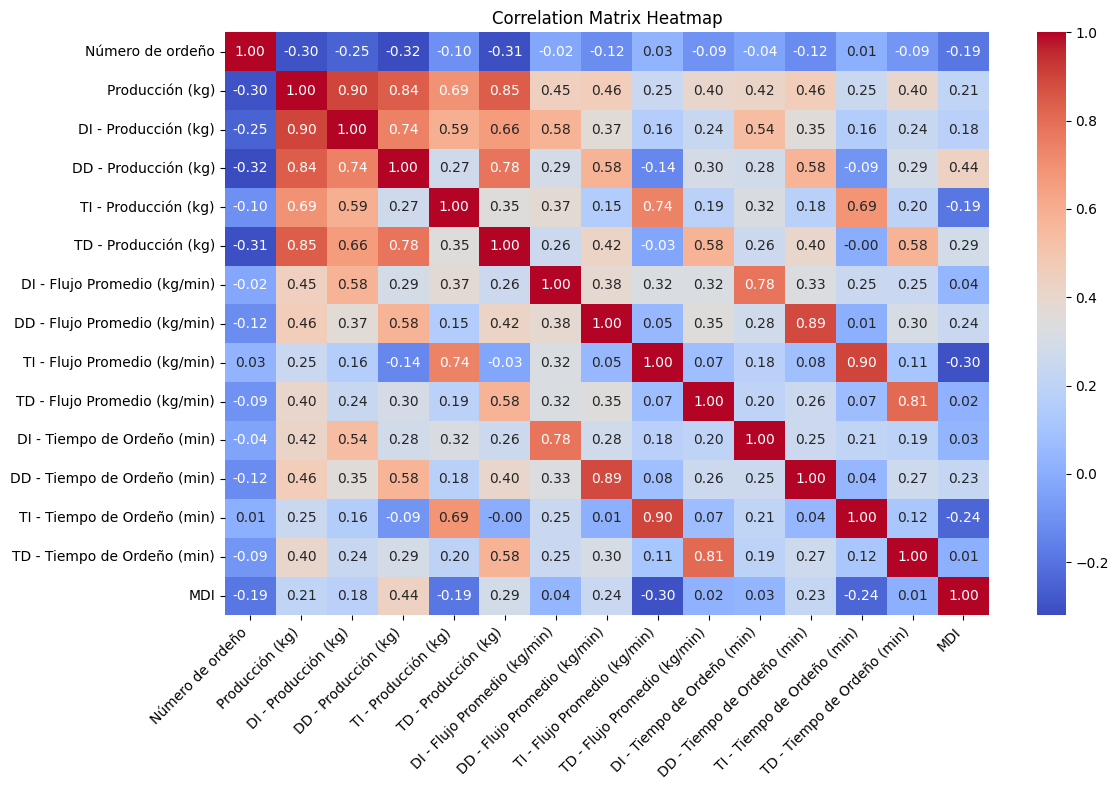

In [ ]:
pd.set_option('display.max_columns', None)

corr_matrix = df_example.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df_example['Hora de inicio'] = df_example['Hora de inicio'].str.replace(' a. m.', ' AM')
df_example['Hora de inicio'] = df_example['Hora de inicio'].str.replace(' p. m.', ' PM')

df_example['Hora de inicio'] = pd.to_datetime(df_example['Hora de inicio'], format='%d/%m/%Y %I:%M %p')

df_example['Fecha'] = df_example['Hora de inicio'].dt.date
df_example['Hora'] = df_example['Hora de inicio'].dt.time

print(df_example[['Hora de inicio', 'Fecha', 'Hora']].head())

       Hora de inicio       Fecha      Hora
0 2025-11-14 11:11:00  2025-11-14  11:11:00
1 2025-11-14 03:03:00  2025-11-14  03:03:00
2 2025-11-13 16:40:00  2025-11-13  16:40:00
3 2025-11-13 09:45:00  2025-11-13  09:45:00
4 2025-11-12 23:54:00  2025-11-12  23:54:00


## Gráfica de Producción

Al graficar la producción por día, se observa una alta dispersión en los datos, lo que dificulta identificar un patrón claro. Para obtener una interpretación más precisa, es necesario agrupar la información a nivel diario en lugar de horario.

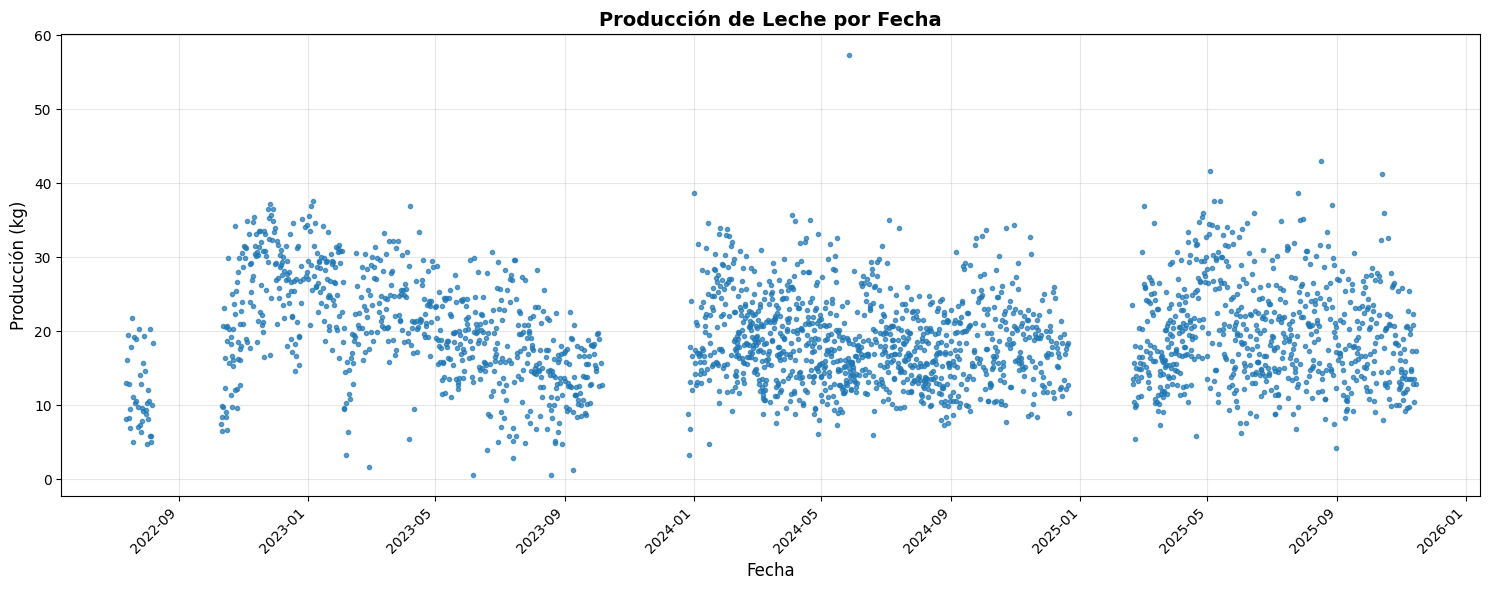

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(df_example['Fecha'], df_example['Producción (kg)'], marker='o', linestyle='', markersize=3, alpha=0.7)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Producción (kg)', fontsize=12)
plt.title('Producción de Leche por Fecha', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se convertirá la duración de ordeño y el intervalo a minutos. Esto nos ayuda a tener los datos de forma más estructurada.

In [ ]:
def duration_to_minutes(duration_str):
    """Convierte formato mm:ss a minutos decimales"""
    try:
        if pd.isna(duration_str):
            return np.nan
        parts = str(duration_str).split(':')
        minutes = int(parts[0])
        seconds = int(parts[1])
        return minutes + seconds / 60
    except:
        return np.nan

In [ ]:
df_example['Duración (minutos)'] = df_example['Duración (mm:ss)'].apply(duration_to_minutes)

In [ ]:
def interval_to_minutes(interval_str):
    """Convierte formato hh:mm a minutos totales"""
    try:
        if pd.isna(interval_str):
            return np.nan
        parts = str(interval_str).split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        return hours * 60 + minutes
    except:
        return np.nan

In [ ]:
df_example['Intervalo de ordeño (minutos)'] = df_example['Intervalo de ordeño (hh:mm)'].apply(interval_to_minutes)

Los registros individuales de ordeño presentan alta variabilidad natural debido a múltiples factores:

- Variación circadiana: La producción de leche varía naturalmente entre ordeños de la mañana, tarde y noche
- Factores operacionales: Diferencias en el tiempo transcurrido desde el último ordeño, estado de la vaca en ese momento específico, y condiciones del robot
- Ruido de medición: Pequeñas variaciones en la precisión de los sensores entre ordeños individuales

Al agregar por día, promediamos estas fluctuaciones, obteniendo una métrica más estable que refleja el verdadero rendimiento productivo diario de la vaca.

Desde el punto de vista fisiológico y de manejo ganadero:

- La producción láctea se evalúa en ciclos de 24 horas, no por ordeño individual
- Los cambios metabólicos, nutricionales y hormonales que afectan la producción operan en escalas de días, no de horas
- Las decisiones de manejo (alimentación, tratamientos, evaluación de salud) se toman con base en tendencias diarias, no en ordeños puntuales

Con datos horarios:

- Los gráficos muestran oscilaciones erráticas difíciles de interpretar
- Es imposible distinguir entre variación normal y cambios significativos en producción
- Se enmascaran tendencias temporales importantes (declive gradual, picos de producción, ciclos estacionales)

Con datos diarios:

- Las tendencias se vuelven visibles: declives graduales en producción, efectos de intervenciones, patrones estacionales
- Facilita la detección de anomalías: días con producción inusualmente baja pueden indicar problemas de salud o manejo
- Permite comparaciones longitudinales más robustas entre períodos

In [ ]:
df_daily = df_example.groupby('Fecha').agg({
    'Producción (kg)': ['sum', 'mean', 'std', 'count'],
    'Duración (minutos)': ['mean', 'sum', 'std'],
    'Intervalo de ordeño (minutos)': ['mean', 'std'],

    'DI - Producción (kg)': ['sum', 'mean'],
    'DD - Producción (kg)': ['sum', 'mean'],
    'TI - Producción (kg)': ['sum', 'mean'],
    'TD - Producción (kg)': ['sum', 'mean'],

    'DI - Flujo Promedio (kg/min)': 'mean',
    'DD - Flujo Promedio (kg/min)': 'mean',
    'TI - Flujo Promedio (kg/min)': 'mean',
    'TD - Flujo Promedio (kg/min)': 'mean',

    'DI - Tiempo de Ordeño (min)': 'mean',
    'DD - Tiempo de Ordeño (min)': 'mean',
    'TI - Tiempo de Ordeño (min)': 'mean',
    'TD - Tiempo de Ordeño (min)': 'mean',
}).reset_index()

df_daily.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in df_daily.columns.values]

df_daily = df_daily.rename(columns={
    'Producción (kg)_sum': 'Producción Total Diaria (kg)',
    'Producción (kg)_mean': 'Producción Promedio por Ordeño (kg)',
    'Producción (kg)_std': 'Desviación Estándar Producción (kg)',
    'Producción (kg)_count': 'Número de Ordeños',
    'Duración (minutos)_mean': 'Duración Promedio (min)',
    'Duración (minutos)_sum': 'Duración Total Diaria (min)',
    'Duración (minutos)_std': 'Desviación Estándar Duración (min)',
    'Intervalo de ordeño (minutos)_mean': 'Intervalo Promedio entre Ordeños (min)',
    'Intervalo de ordeño (minutos)_std': 'Desviación Estándar Intervalo (min)',
})

df_daily['Producción por Minuto (kg/min)'] = df_daily['Producción Total Diaria (kg)'] / df_daily['Duración Total Diaria (min)']
df_daily['Horas entre Ordeños'] = df_daily['Intervalo Promedio entre Ordeños (min)'] / 60

df_daily['Fecha'] = pd.to_datetime(df_daily['Fecha'])

print("="*80)
print("NUEVO DATAFRAME AGRUPADO POR FECHA")
print("="*80)
print(f"\nDimensiones: {df_daily.shape[0]} días × {df_daily.shape[1]} columnas")
print(f"\nRango de fechas: {df_daily['Fecha'].min()} a {df_daily['Fecha'].max()}")
print("\n--- Primeras filas ---")
display(df_daily.head(10))

print("\n--- Información de columnas ---")
display(df_daily.info())

print("\n--- Estadísticas descriptivas ---")
display(df_daily.describe())

print("\n--- Columnas disponibles en df_daily ---")
for i, col in enumerate(df_daily.columns, 1):
    print(f"{i}. {col}")

NUEVO DATAFRAME AGRUPADO POR FECHA

Dimensiones: 1018 días × 28 columnas

Rango de fechas: 2022-07-13 00:00:00 a 2025-11-14 00:00:00

--- Primeras filas ---


,Fecha,Producción Total Diaria (kg),Producción Promedio por Ordeño (kg),Desviación Estándar Producción (kg),Número de Ordeños,Duración Promedio (min),Duración Total Diaria (min),Desviación Estándar Duración (min),Intervalo Promedio entre Ordeños (min),Desviación Estándar Intervalo (min),DI - Producción (kg)_sum,DI - Producción (kg)_mean,DD - Producción (kg)_sum,DD - Producción (kg)_mean,TI - Producción (kg)_sum,TI - Producción (kg)_mean,TD - Producción (kg)_sum,TD - Producción (kg)_mean,DI - Flujo Promedio (kg/min)_mean,DD - Flujo Promedio (kg/min)_mean,TI - Flujo Promedio (kg/min)_mean,TD - Flujo Promedio (kg/min)_mean,DI - Tiempo de Ordeño (min)_mean,DD - Tiempo de Ordeño (min)_mean,TI - Tiempo de Ordeño (min)_mean,TD - Tiempo de Ordeño (min)_mean,Producción por Minuto (kg/min),Horas entre Ordeños
0,2022-07-13,21.13,10.565,3.401184,2,7.141667,14.283333,0.153206,631.5,132.228968,5.95,2.975,6.51,3.255,4.69,2.345,3.98,1.990,0.75,0.84,0.45,0.48,1.14,1.32,0.84,0.93,1.479347,10.525000
1,2022-07-14,16.16,16.160,NaN,1,9.100000,9.100000,NaN,1199.0,NaN,6.19,6.190,0.48,0.480,4.75,4.750,4.74,4.740,0.84,0.30,0.66,0.66,1.38,0.78,1.08,1.14,1.775824,19.983333
2,2022-07-15,19.53,19.530,NaN,1,12.100000,12.100000,NaN,1896.0,NaN,6.83,6.830,0.00,0.000,6.56,6.560,6.14,6.140,1.02,0.00,0.72,0.72,1.50,0.00,1.38,1.26,1.614050,31.600000
3,2022-07-16,21.11,10.555,3.217336,2,9.408333,18.816667,0.766032,818.0,48.083261,5.37,2.685,7.98,3.990,4.02,2.010,3.74,1.870,0.75,0.93,0.54,0.42,1.17,1.41,0.90,0.84,1.121878,13.633333
4,2022-07-17,16.48,8.240,1.838478,2,7.908333,15.816667,0.200347,573.5,72.831998,5.43,2.715,3.09,1.545,4.26,2.130,3.70,1.850,0.72,0.78,0.57,0.51,1.44,1.23,0.96,1.11,1.041939,9.558333
5,2022-07-18,17.92,17.920,NaN,1,10.050000,10.050000,NaN,1193.0,NaN,5.27,5.270,4.15,4.150,4.23,4.230,4.27,4.270,0.90,0.96,0.60,0.66,1.62,1.38,1.02,1.08,1.783085,19.883333
6,2022-07-19,21.88,21.880,NaN,1,10.733333,10.733333,NaN,1543.0,NaN,6.18,6.180,5.65,5.650,5.03,5.030,5.02,5.020,0.96,1.02,0.66,0.66,1.56,1.56,1.26,1.14,2.038509,25.716667
7,2022-07-20,16.20,8.100,4.341636,2,9.716667,19.433333,0.117851,584.5,53.033009,4.42,2.210,4.56,2.280,3.95,1.975,3.27,1.635,0.75,0.78,0.57,0.48,1.50,1.26,1.05,0.78,0.833619,9.741667
8,2022-07-21,19.23,19.230,NaN,1,8.650000,8.650000,NaN,1440.0,NaN,5.30,5.300,5.86,5.860,4.01,4.010,4.06,4.060,1.02,1.02,0.72,0.72,1.80,1.50,1.20,1.32,2.223121,24.000000
9,2022-07-22,10.34,10.340,NaN,1,7.416667,7.416667,NaN,921.0,NaN,2.64,2.640,2.84,2.840,2.33,2.330,2.53,2.530,0.84,0.78,0.60,0.54,1.50,1.44,0.90,0.96,1.394157,15.350000



--- Información de columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Fecha                                   1018 non-null   datetime64[ns]
 1   Producción Total Diaria (kg)            1018 non-null   float64       
 2   Producción Promedio por Ordeño (kg)     1018 non-null   float64       
 3   Desviación Estándar Producción (kg)     895 non-null    float64       
 4   Número de Ordeños                       1018 non-null   int64         
 5   Duración Promedio (min)                 1018 non-null   float64       
 6   Duración Total Diaria (min)             1018 non-null   float64       
 7   Desviación Estándar Duración (min)      895 non-null    float64       
 8   Intervalo Promedio entre Ordeños (min)  1018 non-null   float64       
 9   Desviación Estándar

None


--- Estadísticas descriptivas ---


,Fecha,Producción Total Diaria (kg),Producción Promedio por Ordeño (kg),Desviación Estándar Producción (kg),Número de Ordeños,Duración Promedio (min),Duración Total Diaria (min),Desviación Estándar Duración (min),Intervalo Promedio entre Ordeños (min),Desviación Estándar Intervalo (min),DI - Producción (kg)_sum,DI - Producción (kg)_mean,DD - Producción (kg)_sum,DD - Producción (kg)_mean,TI - Producción (kg)_sum,TI - Producción (kg)_mean,TD - Producción (kg)_sum,TD - Producción (kg)_mean,DI - Flujo Promedio (kg/min)_mean,DD - Flujo Promedio (kg/min)_mean,TI - Flujo Promedio (kg/min)_mean,TD - Flujo Promedio (kg/min)_mean,DI - Tiempo de Ordeño (min)_mean,DD - Tiempo de Ordeño (min)_mean,TI - Tiempo de Ordeño (min)_mean,TD - Tiempo de Ordeño (min)_mean,Producción por Minuto (kg/min),Horas entre Ordeños
count,1018,1018.000000,1018.000000,895.000000,1018.000000,1018.000000,1018.000000,895.000000,1018.000000,895.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,2024-04-08 13:07:53.870333952,46.508674,20.103166,4.756738,2.400786,10.555698,24.729551,1.561102,646.008530,139.638328,10.529499,4.541278,12.780580,5.660419,10.735786,4.450147,12.462809,5.451322,1.024173,1.089388,0.679752,0.839268,1.576616,1.598146,1.084088,1.309890,1.910393,10.766809
min,2022-07-13 00:00:00,3.260000,3.260000,0.028284,1.000000,5.908333,6.100000,0.000000,0.000000,0.707107,0.370000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000,0.360000,0.000000,0.000000,0.000000,0.288046,0.000000
25%,2023-05-26 06:00:00,34.822500,16.370625,2.397789,2.000000,9.025000,19.170833,0.766032,474.416667,62.743240,7.532500,3.600000,9.910000,4.234667,4.422500,2.808125,10.000000,4.374167,0.960000,0.990000,0.510000,0.750000,1.460000,1.440000,0.920000,1.222500,1.726279,7.906944
50%,2024-04-25 12:00:00,47.450000,19.242500,4.419417,2.000000,10.219444,24.391667,1.314767,612.000000,115.332490,10.450000,4.357500,13.150000,5.237500,11.920000,4.702917,12.675000,5.362500,1.040000,1.080000,0.740000,0.870000,1.600000,1.580000,1.160000,1.340000,1.953590,10.200000
75%,2025-03-04 18:00:00,57.487500,23.832083,6.377229,3.000000,11.759375,29.745833,2.056448,758.375000,194.292882,13.450000,5.325833,15.857500,6.863750,15.367500,5.852917,15.230000,6.475000,1.120000,1.220000,0.840000,0.960000,1.710000,1.760000,1.290000,1.440000,2.148543,12.639583
max,2025-11-14 00:00:00,93.720000,43.050000,23.501265,6.000000,29.850000,59.700000,29.132799,1896.000000,753.775829,22.090000,10.070000,24.520000,14.210000,29.860000,12.200000,25.210000,12.180000,2.200000,1.820000,1.920000,2.700000,4.000000,2.880000,2.790000,3.000000,2.979239,31.600000
std,NaN,16.133181,5.636462,3.192808,0.856739,2.222373,8.534261,1.472058,230.664482,105.672115,3.946625,1.416884,4.193408,2.024981,5.952706,2.212967,4.299143,1.758141,0.168478,0.190439,0.223350,0.186350,0.254876,0.281764,0.284198,0.239748,0.372014,3.844408



--- Columnas disponibles en df_daily ---
1. Fecha
2. Producción Total Diaria (kg)
3. Producción Promedio por Ordeño (kg)
4. Desviación Estándar Producción (kg)
5. Número de Ordeños
6. Duración Promedio (min)
7. Duración Total Diaria (min)
8. Desviación Estándar Duración (min)
9. Intervalo Promedio entre Ordeños (min)
10. Desviación Estándar Intervalo (min)
11. DI - Producción (kg)_sum
12. DI - Producción (kg)_mean
13. DD - Producción (kg)_sum
14. DD - Producción (kg)_mean
15. TI - Producción (kg)_sum
16. TI - Producción (kg)_mean
17. TD - Producción (kg)_sum
18. TD - Producción (kg)_mean
19. DI - Flujo Promedio (kg/min)_mean
20. DD - Flujo Promedio (kg/min)_mean
21. TI - Flujo Promedio (kg/min)_mean
22. TD - Flujo Promedio (kg/min)_mean
23. DI - Tiempo de Ordeño (min)_mean
24. DD - Tiempo de Ordeño (min)_mean
25. TI - Tiempo de Ordeño (min)_mean
26. TD - Tiempo de Ordeño (min)_mean
27. Producción por Minuto (kg/min)
28. Horas entre Ordeños


## Análisis de las gráficas

Ahora se observa un patrón claro en la producción de las vacas. Se identifica claramente el ciclo de lactancia característico, donde la vaca alcanza su pico máximo de producción entre los 60 y 90 días posparto, seguido de un declive gradual.

Sin embargo, faltan datos críticos de partos e inseminaciones para deducir con mayor precisión el comportamiento de estos patrones. A pesar de que las gráficas muestran tendencias definidas, aún se requieren transformaciones adicionales y datos complementarios para realizar un análisis apropiado.

Finalmente, se observa una clara correlación entre las variables transformadas, lo que facilita la comprensión de los patrones productivos y sus relaciones.

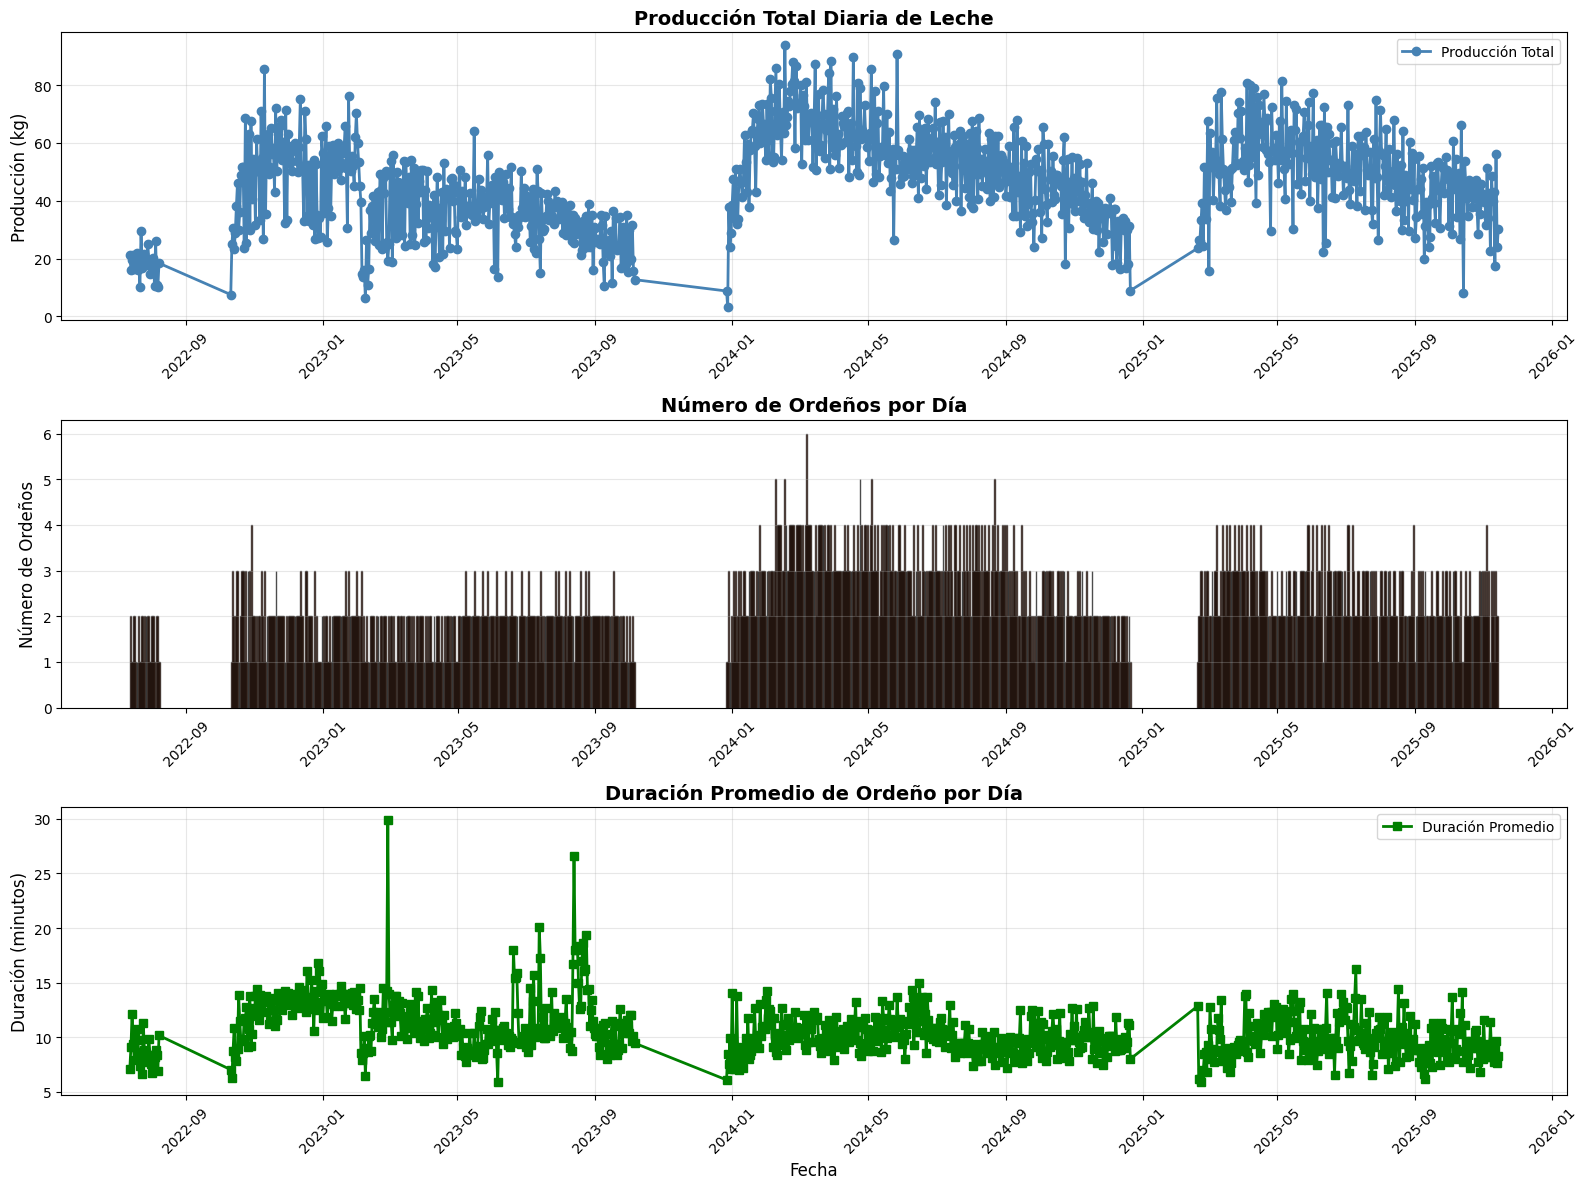

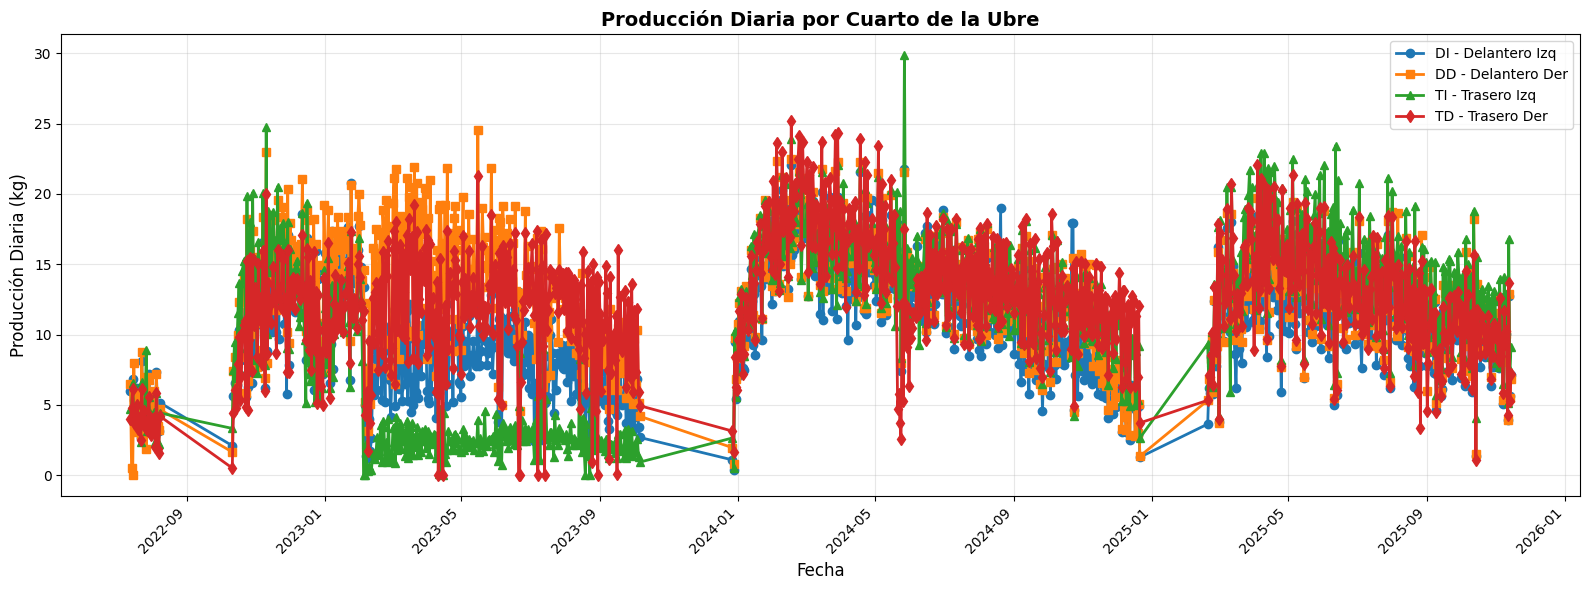


=== RESUMEN ESTADÍSTICO ===
Producción diaria promedio: 46.51 kg
Producción diaria máxima: 93.72 kg
Producción diaria mínima: 3.26 kg
Ordeños promedio por día: 2.4
Intervalo promedio entre ordeños: 10.77 horas


In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Producción total diaria
axes[0].plot(df_daily['Fecha'], df_daily['Producción Total Diaria (kg)'],
             marker='o', linewidth=2, markersize=6, color='steelblue', label='Producción Total')
axes[0].set_ylabel('Producción (kg)', fontsize=12)
axes[0].set_title('Producción Total Diaria de Leche', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Número de ordeños por día
axes[1].bar(df_daily['Fecha'], df_daily['Número de Ordeños'],
            color='coral', alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Número de Ordeños', fontsize=12)
axes[1].set_title('Número de Ordeños por Día', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Duración promedio por ordeño
axes[2].plot(df_daily['Fecha'], df_daily['Duración Promedio (min)'],
             marker='s', linewidth=2, markersize=6, color='green', label='Duración Promedio')
axes[2].set_xlabel('Fecha', fontsize=12)
axes[2].set_ylabel('Duración (minutos)', fontsize=12)
axes[2].set_title('Duración Promedio de Ordeño por Día', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Gráfico 2: Producción por cuarto (suma diaria)
plt.figure(figsize=(16, 6))
plt.plot(df_daily['Fecha'], df_daily['DI - Producción (kg)_sum'], marker='o', label='DI - Delantero Izq', linewidth=2)
plt.plot(df_daily['Fecha'], df_daily['DD - Producción (kg)_sum'], marker='s', label='DD - Delantero Der', linewidth=2)
plt.plot(df_daily['Fecha'], df_daily['TI - Producción (kg)_sum'], marker='^', label='TI - Trasero Izq', linewidth=2)
plt.plot(df_daily['Fecha'], df_daily['TD - Producción (kg)_sum'], marker='d', label='TD - Trasero Der', linewidth=2)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Producción Diaria (kg)', fontsize=12)
plt.title('Producción Diaria por Cuarto de la Ubre', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Estadísticas generales
print("\n=== RESUMEN ESTADÍSTICO ===")
print(f"Producción diaria promedio: {df_daily['Producción Total Diaria (kg)'].mean():.2f} kg")
print(f"Producción diaria máxima: {df_daily['Producción Total Diaria (kg)'].max():.2f} kg")
print(f"Producción diaria mínima: {df_daily['Producción Total Diaria (kg)'].min():.2f} kg")
print(f"Ordeños promedio por día: {df_daily['Número de Ordeños'].mean():.1f}")
print(f"Intervalo promedio entre ordeños: {df_daily['Horas entre Ordeños'].mean():.2f} horas")